In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import warnings

plt.style.use('science')
warnings.filterwarnings("ignore", category=RuntimeWarning)

saveFigures = True
figurePath = '/home/silas/Documents/GitHub/TIC/figures/'

# Introduction to Information Theory and Coding

## Preview

Information theory answers two fundamental questions in communication theory: What is the ultimate data compression (answer: the entropy H ), and what is the ultimate transmission rate of communication (answer: the channel capacity C). For this reason some consider information theory to be a subset of communication theory. 

## Applications

- **Communication Theory:** Limits of Communication Theory.

- **Probability Theory:** Limit Theorems Large Desviations.

- **Statistics:** Hypothesis Testing Fisher Infomation.

- **Mathematics:** Inequalities.

- **Computer Science:** Kolmogorov Complexity.

- **Phisics:** AEP, Thermodynamics, Quantum Information Theory.

## Solutions for Class 02

This notebook contains the solutions to complementary activities for the subject of information theory and coding. The functions below implement the calculation of the mean value of 'l' questions given a set of probabilities and the entropy respectively.

In [14]:
def solve_graph(Pl):
    """
    Calculate the average value for binary S/N trees

    Parameters
    ----------
    Pl : np.array
        Set of probabilities for each question

    Returns
    -------
    float
        mean value (expected value operation for a discrete random variable)
    """
    average = 0
    question_indexes = Pl.shape[0]
    for idx in range(1, question_indexes + 1):
        average += idx * Pl[idx - 1]
    return average

def entropy(pi, base='bits'):
    """
    Calculate the Shannon entropy of the given distributions

    Parameters
    ----------
    pi : np.array
        Discrete distribution
        
    base : str, optional
        The logarithmic base to use, by default 'bits'

    Returns
    -------
    float
        The calculated entropy.
    """
    if base == 'bits':
        return -np.sum(pi * np.log2(pi))
    elif base == 'nat':
        return -np.sum(pi * np.log(pi))
    else:
        raise ValueError('logarithmic base defined incorrectly')

### Problem 01

Calculate $H(Q) = H(x)$ for the following distribution:

| $x$    | $Q(x)$ |
| -------- | ------- |
| $0$  | $3/10$ |
| $1$ | $3/5$ |
| $2$    | $1/20$ |
| $3$    | $1/20$ |

Then design an S/N protocol and calculate the expected value $E[l]$ where $L$ is the number of questions until $x$ is identified and verify that $E[L] \ge H(Q)$

<br>
<center>
    <img src="https://i.postimg.cc/2ycWdRbX/Screenshot-from-2024-11-28-22-02-18.png">
</center>
</br>

$$P\{x\} = \{1\} \cup \{0\} \cup \{2,3\}, P[x \in \{2,3\}] = P_2 + P_3$$

Calculating the average value we have:

$$E[l] = \sum_{l} l P_l = \frac{3}{5} +  2\frac{3}{10} +  3\frac{1}{10} = \frac{3}{2}$$

For entropy we will have:

$$H(x) = - \sum P_i \log_{2}{P_i} = -\frac{3}{10}\log_{2}{(\frac{3}{10})}-\frac{3}{5}\log_{2}{(\frac{3}{5})}-\frac{1}{20}\log_{2}{(\frac{1}{20})}-\frac{1}{20}\log_{2}{(\frac{1}{20})} = 1.39546$$

So we see that $E[l] > H(Q)$, where $E[l]$ is close to entropy, we also see that the distribution $Q(X)$ does not assume a diotic distribution and three questions were necessary.

In [15]:
Qx = np.array([3/10, 3/5, 1/20, 1/20]) # define the distribution Q(x)
Pl = np.array([3/5, 3/10, 1/10]) # set the probability of each question

print(f'Entropy: H(x) = {np.round(entropy(Qx), 3)} bits')
print(f'Average: E[l] = {solve_graph(Pl)}')

Entropy: H(x) = 1.395 bits
Average: E[l] = 1.5


## Properties

- **Lemma 2.1.1:** $H(x) \ge 0$

- **Proof:** $0\leq p(x)\leq1$ implies that log ${\frac{1}{p(x)}}\geq0.$

- **Lemma 2.1.2:** $H_{b}(X)=(\log_{b}a)H_{a}(X).$

- **Proof:** $\textstyle\log_{b}p=\log_{b}a\log_{a}p.$

The second property of entropy enables us to change the base of the
logarithm in the deﬁnition. Entropy can be changed from one base to
another by multiplying by the appropriate factor.

Let:
$$X=\left\{\begin{array}{l l}{{1}}&{{\mathrm{with~probability~}p,}}\\ {{0}}&{{\mathrm{with~probability~}1-p.}}\end{array}\right.$$

Then

$$H(X)=-p\log p-(1-p)\log(1-p) := \ H(p).$$

In [16]:
def binary_entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

In particular, $H(X) = 1$ bit when $p = 1/2$ . The graph of the function $H(p)$ is shown below:

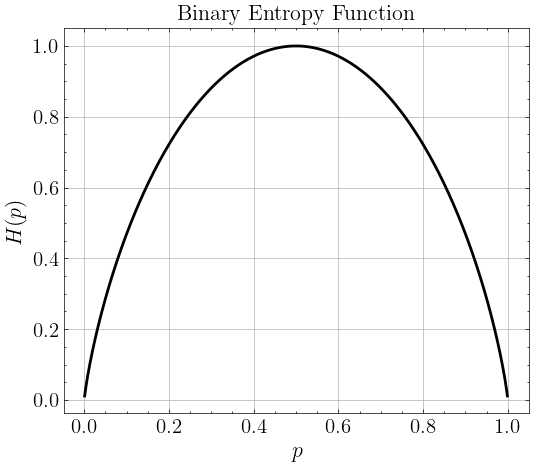

In [17]:
p = np.linspace(0.001, 0.999, 1000)
H = binary_entropy(p)

plt.figure(figsize=(6, 5))
plt.plot(p, H, linewidth = 2, color = 'k')
plt.grid()
plt.title('Binary Entropy Function', fontsize=16)
plt.xlabel('$p$', fontsize=16)
plt.ylabel('$H(p)$', fontsize=16);

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

if saveFigures:
    plt.savefig(figurePath + 'Binary Entropy.png', dpi=600)

Entropy is a concave function of the distribution and equals 0 when $p = 0$ or $1$. This makes sense, because when $p = 0$ or $1$, the variable is not random and there is no uncertainty. Similarly, the uncertainty is maximum when $p = 1/2$ , which also corresponds to the maximum value of the entropy.

Other properties to consider:

$\sum_{i} P_i = 1; P_i \ge 0$

## Suggestions given in class

Consider, as an example, the Shannon entropy of probabilities defined over three possible outcomes:
$$H(p_{1},p_{2},p_{3})\equiv-p_{1}\log p_{1}-p_{2}\log p_{2}-p_{3}\log p_{3}$$
the behaviour of $H$ over the surface of points ${0}\leq p_{i}\leq1$ such that $P_1+P_2+P_3=1$

In [18]:
def shannon_entropy(p1, p2):
    p3 = 1 - p1 - p2
    if p3 < 0 or p1 < 0 or p2 < 0:
        return np.nan 
    return -sum(p * np.log(p) for p in [p1, p2, p3] if p > 0)

## Simplex Surface Plot

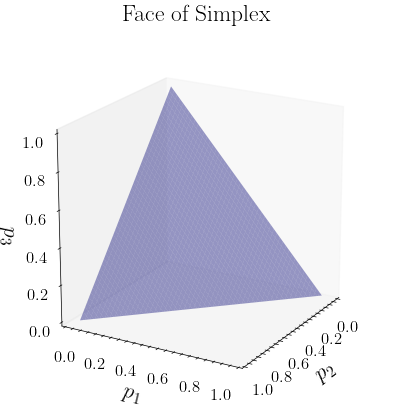

In [28]:
nPoints = 200

# Defines the bounds and implied region
x = np.linspace(0, 1, nPoints)
y = np.linspace(0, 1, nPoints)

X, Y = np.meshgrid(x, y)
Z = 1 - X - Y

# Mask for valid region
mask = (X >= 0) & (Y >= 0) & (X + Y <= 1)
Z = np.where(mask, Z, np.nan)

# Plot surface
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, color='b', alpha=0.4, edgecolor='none')

ax.set_xlabel('$p_2$', fontsize=16)
ax.set_ylabel('$p_1$', fontsize=16)
ax.set_zlabel('$p_3$', fontsize=16)
ax.set_title('Face of Simplex', fontsize=17)
ax.tick_params(axis='x', labelsize=12) 
ax.tick_params(axis='y', labelsize=12)  
ax.tick_params(axis='z', labelsize=12) 

ax.set_box_aspect([1, 1, 1], zoom=0.90)
ax.view_init(elev=20, azim=30)
ax.grid(False)

if saveFigures:
    plt.savefig(figurePath + 'Face of Simplex.png', dpi=600)

## Reproduce the figure on Slide 8

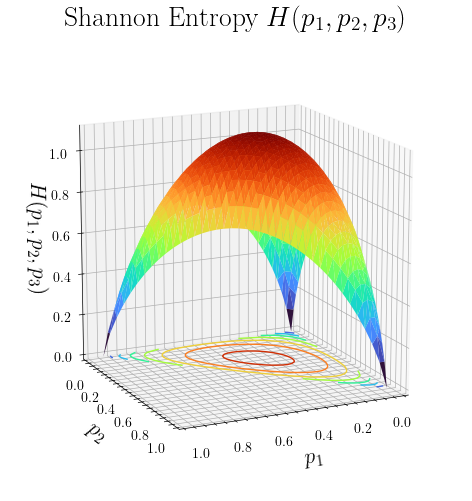

In [24]:
nPoints = 40

p1 = np.linspace(0, 1, nPoints)
p2 = np.linspace(0, 1, nPoints)
P1, P2 = np.meshgrid(p1, p2)

H = np.zeros(P1.shape)

# get the entropy values
for i in range(P1.shape[0]):
    for j in range(P1.shape[1]):
        H[i, j] = shannon_entropy(P1[i, j], P2[i, j])

# get a valid points mask
mask = P1 + P2 <= 1

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(P1[mask], P2[mask], H[mask], cmap='turbo', edgecolor='none')
ax.contour(P1, P2, H, zdir='z', offset=0, cmap='turbo')

ax.set_xlabel('$p_1$', fontsize=16)
ax.set_ylabel('$p_2$', fontsize=16)
ax.set_zlabel('$H(p_1, p_2, p_3)$', fontsize=16)
ax.set_title('Shannon Entropy $H(p_1, p_2, p_3)$', fontsize=20)

ax.set_box_aspect([1, 1, 1], zoom=0.90)
ax.view_init(elev=15, azim=65)

if saveFigures:
    plt.savefig(figurePath + 'Shannon Entropy 3D.png', dpi=600)

# Referências

[1] Thomas M. Cover and Joy A. Thomas. Elements of Information Theory. John Wiley & Sons, Inc., New York, USA, 1991.